In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

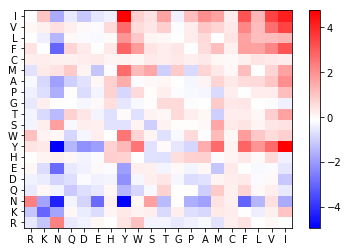

In [51]:
pre = "/Users/weilu/Research/server/jan_2019/optimization/gammas_dec30/"
gamma_file = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma_location = pre + gamma_file
gamma = np.loadtxt(gamma_location)
plot_contact_well(gamma[:210], inferBound=True)

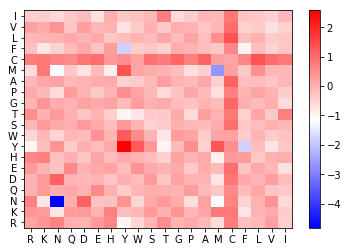

In [53]:
plot_contact_well(gamma[210:420], inferBound=True)

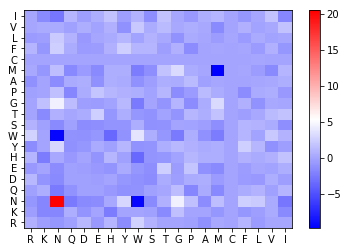

In [59]:
plot_contact_well(gamma[420:], inferBound=True)

# filtered result have very large values

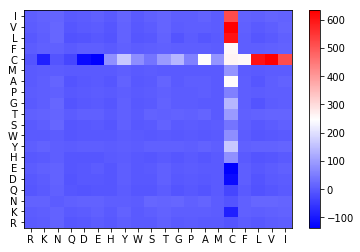

In [57]:
pre = "/Users/weilu/Research/server/jan_2019/optimization/gammas_dec30/"
gamma_file = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
gamma_location = pre + gamma_file
# gamma = np.loadtxt(gamma_location)
gamma_filtered = np.loadtxt(gamma_location, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
plot_contact_well(gamma_filtered[:210], inferBound=True)

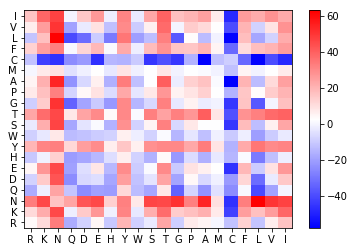

In [58]:
plot_contact_well(gamma_filtered[210:420], inferBound=True)

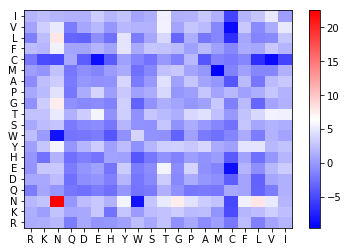

In [61]:
plot_contact_well(gamma_filtered[420:], inferBound=True)

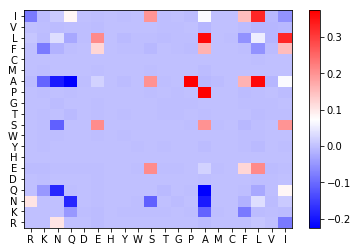

In [48]:
gamma_iter1_location = "/Users/weilu/Research/server/feb_2019/optimization_iter1/gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma_iter1 = np.loadtxt(gamma_iter1_location)
plot_contact_well(gamma_iter1[:210], inferBound=True)


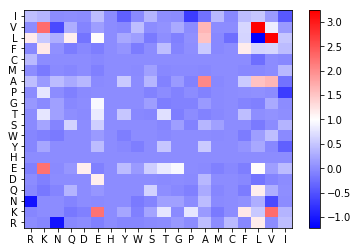

In [50]:
gamma_iter1_location = "/Users/weilu/Research/server/feb_2019/optimization_iter1/gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
gamma_iter1 = np.loadtxt(gamma_iter1_location, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
plot_contact_well(gamma_iter1[:210], inferBound=True)


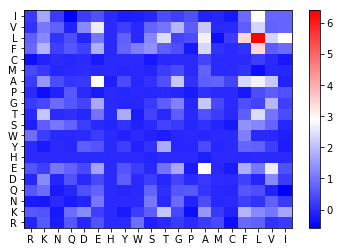

In [62]:
plot_contact_well(gamma_iter1[210:420], inferBound=True)

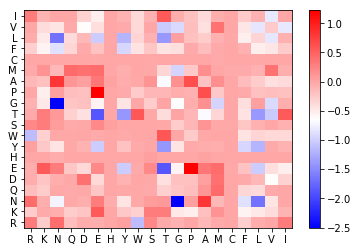

In [63]:
plot_contact_well(gamma_iter1[420:], inferBound=True)

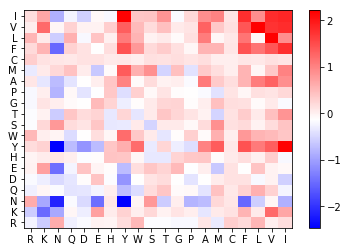

In [52]:
plot_contact_well((0.5*(gamma+gamma_iter1))[:210], inferBound=True)

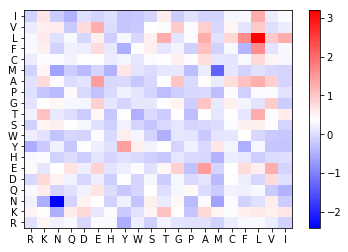

In [54]:
plot_contact_well((0.5*(gamma+gamma_iter1))[210:420], inferBound=True)

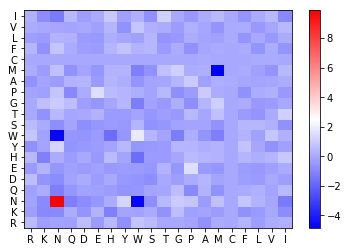

In [64]:
plot_contact_well((0.5*(gamma+gamma_iter1))[420:], inferBound=True)

In [29]:
gamma_iter2_location = "/Users/weilu/Research/server/feb_2019/optimization_iter2/gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
gamma_iter2 = np.loadtxt(gamma_iter2_location)




In [30]:
gamma_iter2.shape

(630,)

In [6]:
gamma_iter1.shape

(630,)

In [4]:
gamma.shape

(630,)

In [70]:
alpha = 0.5
new_gamma = (alpha*gamma + (1-alpha)*gamma_iter1).astype(float)

In [71]:
gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization_iter1/iteration_gamma.dat"
gamma_format_convertion_iteration_to_simulation(new_gamma, gamma_for_simulation)



In [32]:
alpha = 0.5
new_gamma_iter2 = alpha*new_gamma + (1-alpha)*gamma_iter2

In [8]:
def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = iteration_gamma
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1

In [34]:
gamma_for_simulation = "/Users/weilu/Research/server/feb_2019/optimization_iter2/iteration_gamma.dat"
gamma_format_convertion_iteration_to_simulation(new_gamma_iter2, gamma_for_simulation)


In [21]:
sum(abs(gamma))

450.08205000000004

In [37]:
sum(new_gamma)

-18.644774999999985

In [36]:
sum(new_gamma_iter2)

6.715617500000002

In [38]:
sum(abs(new_gamma))

227.90236500000003

In [31]:
sum(abs(gamma_iter2))

60.135610000000014

In [22]:
sum(abs(gamma_iter1))

19.27512000000001

In [27]:
sum(abs(new_gamma))

227.90236500000003

In [ ]:
pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/"
os.chdir(pre)
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    hamiltonian='phi_list.txt', gamma_file_name="gammas/original_gamma.dat", 
    training_set_file=pre+"proteins_name_list.txt", 
    training_decoy_method='lammps', num_decoys=20, use_filtered_gammas=False)
os.chdir('/Users/weilu/opt/notebook/Optimization')






In [83]:
pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/"
os.chdir(pre)
z_scores, e_natives, e_mgs, e_mg_stds = validate_hamiltonian_wei(
    hamiltonian='phi_list.txt', gamma_file_name="gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered", 
    training_set_file=pre+"proteins_name_list.txt", 
    training_decoy_method='lammps', num_decoys=20, use_filtered_gammas=True)
os.chdir('/Users/weilu/opt/notebook/Optimization')





0 (26.111526174376845+0j)


In [84]:
z_scores

[(26.111526174376845+0j),
 (3.00025368541766+0j),
 (12.590567106863176+0j),
 (5.481194159837844+0j),
 (3.431628506338291+0j),
 (4.099496620986136+0j)]

In [79]:
z_scores

[4.275670762206064,
 1.6711123271156643,
 1.2987481766617357,
 1.908658755884769,
 -0.3195458350593127,
 1.4200994467781423]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-3.87528426, -3.77695332, -3.67862238, -3.58029143, -3.48196049,
        -3.38362954, -3.2852986 , -3.18696766, -3.08863671, -2.99030577,
        -2.89197483, -2.79364388, -2.69531294, -2.59698199, -2.49865105,
        -2.40032011, -2.30198916, -2.20365822, -2.10532728, -2.00699633,
        -1.90866539, -1.81033444, -1.7120035 , -1.61367256, -1.51534161,
        -1.41701067, -1.31867973, -1.22034878, -1.12201784, -1.02368689,
        -0.92535595, -0.82702501, -0.72869406, -0.63036312, -0.53203218,
        -0.43370123, -0.33537029, -0.23703934, -0.1387084 , -0.04037746,
         0.05795349,  0.15628443,  0.25461537,  0.35294632,  0.45127726,
         0.54960821,  0.64793915,  0.74627009,  0.84460104,  0.94293198,
         1.04126292]),
 <a list of 50 Patch 

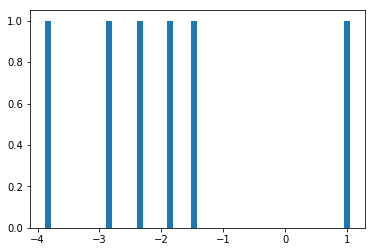

In [74]:
plt.hist(z_scores, bins=50)
# plt.hist(-origin_z_scores, bins=50, alpha=0.5)

In [75]:
z_scores

[-3.8752842633712388,
 -2.8133251666589154,
 -1.506031524032226,
 1.0412629240694964,
 -1.8206457115910528,
 -2.3462384150039015]